# A/B Testing for Marketing campaign

Marketing A/B testing dataset
Marketing companies want to run successful campaigns, but the market is complex and several options can work. So normally they tun A/B tests, that is a randomized experimentation process wherein two or more versions of a variable (web page, page element, banner, etc.) are shown to different segments of people at the same time to determine which version leaves the maximum impact and drive business metrics.

The companies are interested in answering two questions:

- Would the campaign be successful?
- If the campaign was successful, how much of that success could be attributed to the ads?

With the second question in mind, we normally do an A/B test. The majority of the people will be exposed to ads (the experimental group). And a small portion of people (the control group) would instead see a Public Service Announcement (PSA) (or nothing) in the exact size and place the ad would normally be.

The idea of the dataset is to analyze the groups, find if the ads were successful, how much the company can make from the ads, and if the difference between the groups is statistically significant.

Data dictionary:

- Index: Row index
- user id: User ID (unique)
- test group: If "ad" the person saw the advertisement, if "psa" they only saw the public service announcement
- converted: If a person bought the product then True, else is False
- total ads: Amount of ads seen by person
- most ads day: Day that the person saw the biggest amount of ads
- most ads hour: Hour of day that the person saw the biggest amount of ads

# Loading Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/marketing-ab-testing/marketing_AB.csv


# Reading the data

In [2]:
df = pd.read_csv("/kaggle/input/marketing-ab-testing/marketing_AB.csv")

# Initial inspection

In [3]:
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


# Checking the datatypes

We have 6 different features, some of them are type of int, 2 features are strings and the converted feature is type of boolean

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


# Number of rows and columns

Half a million entries in our dataset

In [5]:
df.shape

(588101, 7)

In [6]:
print("Is NA?")
print(df.isna().sum())
print("Is NULL?")
print(df.isnull().sum())


Is NA?
Unnamed: 0       0
user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64
Is NULL?
Unnamed: 0       0
user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64


# Preprossesing

Convert the boolean True/False values, to int

In [7]:
df["converted"] = np.where(df["converted"]==True, 1, 0)

# Drop unecessary column

In [8]:
df.drop('Unnamed: 0', axis=1, inplace=True)

# EDA
Exploratory Data Analysis

In [9]:
df.describe(include='all')

,user id,test group,converted,total ads,most ads day,most ads hour
count,5.881010e+05,588101,588101.000000,588101.000000,588101,588101.000000
unique,NaN,2,NaN,NaN,7,NaN
top,NaN,ad,NaN,NaN,Friday,NaN
freq,NaN,564577,NaN,NaN,92608,NaN
mean,1.310692e+06,NaN,0.025239,24.820876,NaN,14.469061
std,2.022260e+05,NaN,0.156850,43.715181,NaN,4.834634
min,9.000000e+05,NaN,0.000000,1.000000,NaN,0.000000
25%,1.143190e+06,NaN,0.000000,4.000000,NaN,11.000000
50%,1.313725e+06,NaN,0.000000,13.000000,NaN,14.000000
75%,1.484088e+06,NaN,0.000000,27.000000,NaN,18.000000


## number and piechart of different test group / campaigns that were viewed by customers-consumers

The ad was certainly viewed way more than from the public service annoucements 

ad     564577
psa     23524
Name: test group, dtype: int64


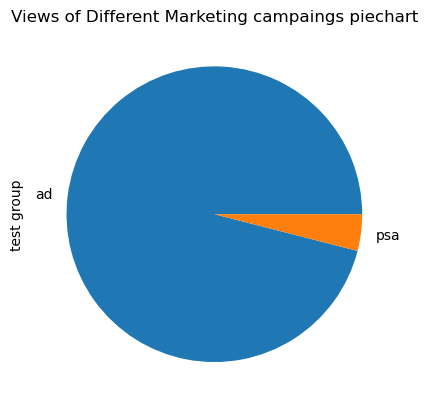

In [10]:
print(df["test group"].value_counts())

ax = df["test group"].value_counts().plot(kind="pie")
ax.set_title('Views of Different Marketing campaings piechart')
plt.show()

## Numbers and piechart of those who converted and decided to choose the offer based on the different marketinig campaign

Seems a portion (2.52%) of those who viewed the different marketing campaings were converted and decided to follow the new marketing product

% Not converted 97.4761137967798
% Converted 2.523886203220195


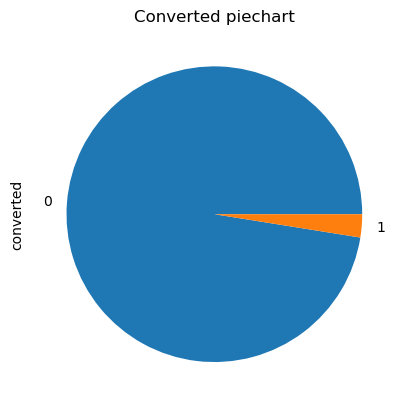

In [11]:
print("% Not converted", 100 * df["converted"].value_counts()[0]/df["converted"].value_counts().sum())
print("% Converted", 100 * df["converted"].value_counts()[1]/df["converted"].value_counts().sum())

ax = df["converted"].value_counts().plot(kind="pie")
ax.set_title('Converted piechart')
plt.show()

# Calculate conversion rates

In [12]:
df.groupby("test group")["converted"].mean()*100

test group
ad     2.554656
psa    1.785411
Name: converted, dtype: float64

From these conversion rates, it can be concluded that the ad group achieved a higher conversion rate (2.5547%) compared to the PSA group (1.7854%). This indicates that the advertisements were successful in generating conversions and the overall ad campaign was effective.

# Bivariate plots/statistics

Lets see how many of the customers who took part of different marketing campaings got affected by them and converted to the new marketing products

converted        0      1
test group               
ad          550154  14423
psa          23104    420


<Axes: xlabel='test group'>

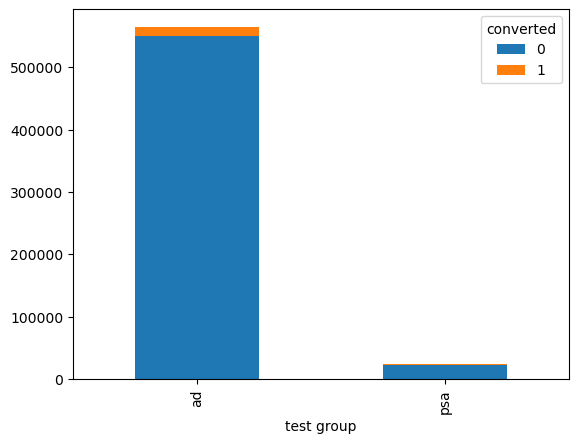

In [13]:
print(df.groupby("converted")["test group"].value_counts().unstack('converted'))

df.groupby("converted")["test group"].value_counts().unstack('converted').plot(kind="bar", stacked=True)


## Inspecting those who took part of Public Service accouncements campaings

converted  test group
0          psa           23104
1          psa             420
Name: test group, dtype: int64


<Axes: xlabel='converted,test group'>

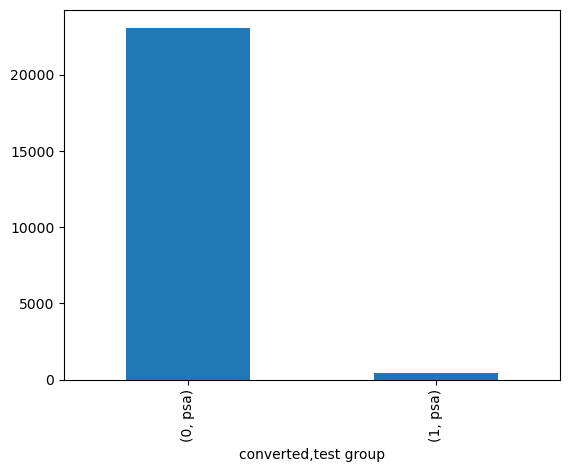

In [14]:
print(df.loc[df["test group"]=="psa"].groupby("converted")["test group"].value_counts())
df.loc[df["test group"]=="psa"].groupby("converted")["test group"].value_counts().plot(kind="bar", stacked=True)


## Inspecting those who took part of Public Service accouncements campaings

converted  test group
0          ad            550154
1          ad             14423
Name: test group, dtype: int64


<Axes: xlabel='converted,test group'>

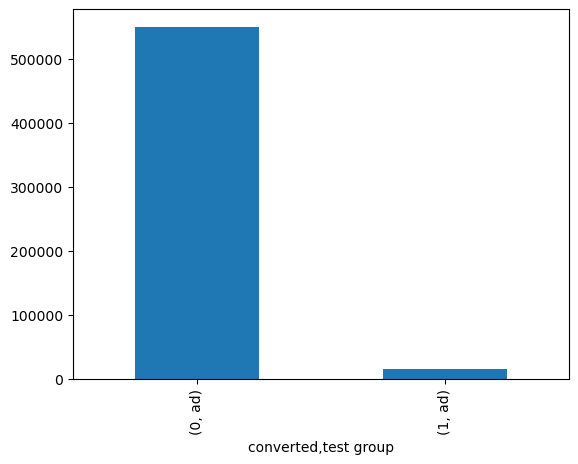

In [15]:
print(df.loc[df["test group"]=="ad"].groupby("converted")["test group"].value_counts())
df.loc[df["test group"]=="ad"].groupby("converted")["test group"].value_counts().plot(kind="bar", stacked=True)

## Most profitable days and those who converted with new marketing campaings

Seems Monday is the the best day to air adventishments and seems Tuesday for public service anouncement campaings

most ads day
Friday       2057
Monday       2857
Saturday     1719
Sunday       2090
Thursday     1790
Tuesday      2312
Wednesday    2018
Name: converted, dtype: int64


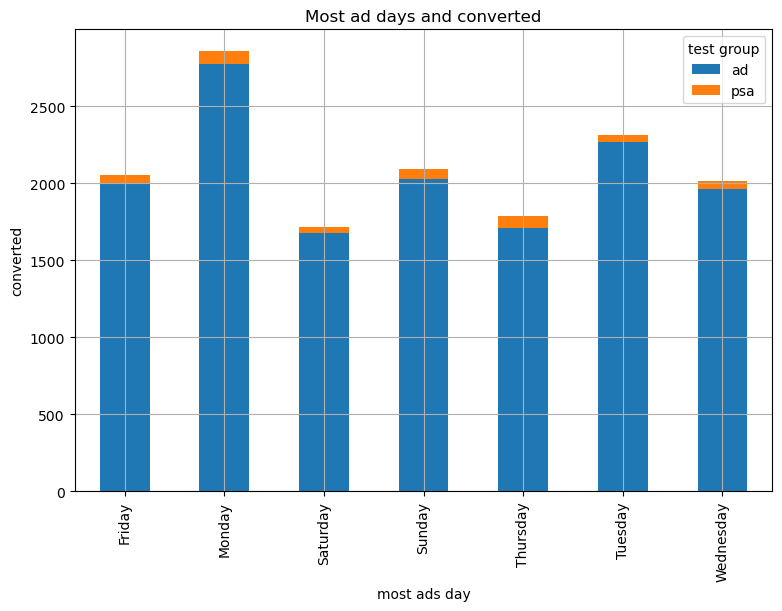

In [16]:
print(df.groupby("most ads day")["converted"].sum())

ax =df.groupby(by =['most ads day', 'test group']).sum()['converted'].unstack('test group').plot(kind='bar', figsize=(9,6), grid= True, stacked= True)
ax.set_ylabel('converted')
ax.set_title('Most ad days and converted')
plt.show()

### for Advertishement campaigns, which day we had the greatest conversion?

During Monday

most ads day
Friday       1995
Monday       2778
Saturday     1679
Sunday       2027
Thursday     1711
Tuesday      2270
Wednesday    1963
Name: converted, dtype: int64


<Axes: xlabel='most ads day'>

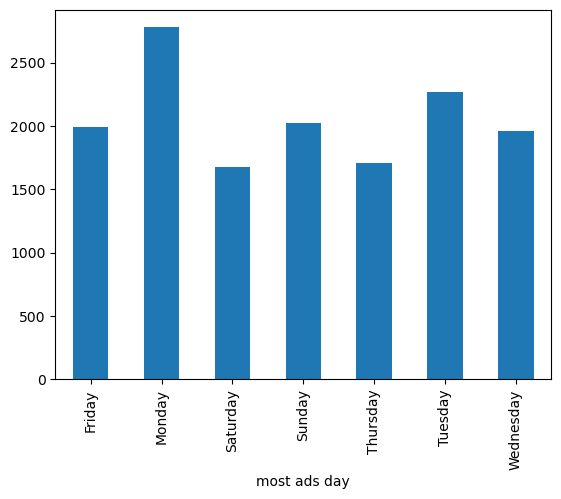

In [17]:
print(df.loc[df["test group"]=="ad"].groupby("most ads day")["converted"].sum())
df.loc[df["test group"]=="ad"].groupby("most ads day")["converted"].sum().plot(kind="bar")

### for Public Service Anouncement campaigns, which day we had the greatest conversion?

during Monday and Thursday

most ads day
Friday       62
Monday       79
Saturday     40
Sunday       63
Thursday     79
Tuesday      42
Wednesday    55
Name: converted, dtype: int64


<Axes: xlabel='most ads day'>

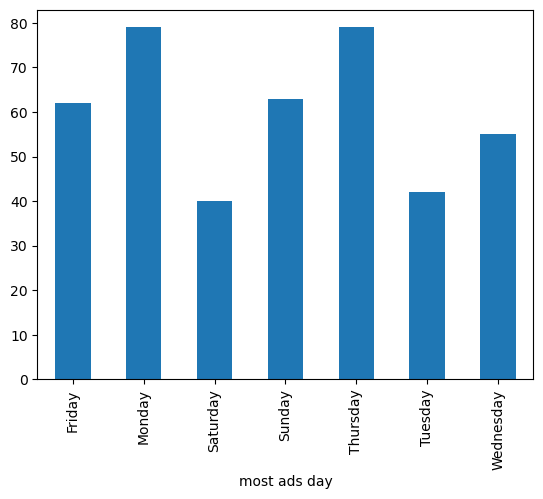

In [18]:
print(df.loc[df["test group"]=="psa"].groupby("most ads day")["converted"].sum())
df.loc[df["test group"]=="psa"].groupby("most ads day")["converted"].sum().plot(kind="bar")

## Most profitable hours with new marketing campaings
The most profitable hour for both campaings in the 15th hour, we need to inspect further for each of the 2 campaings.

most ads hour
0      102
1       62
2       39
3       28
4       11
5       16
6       46
7      116
8      344
9      595
10     838
11    1022
12    1127
13    1176
14    1281
15    1325
16    1156
17     987
18     885
19     811
20     862
21     867
22     690
23     457
Name: converted, dtype: int64


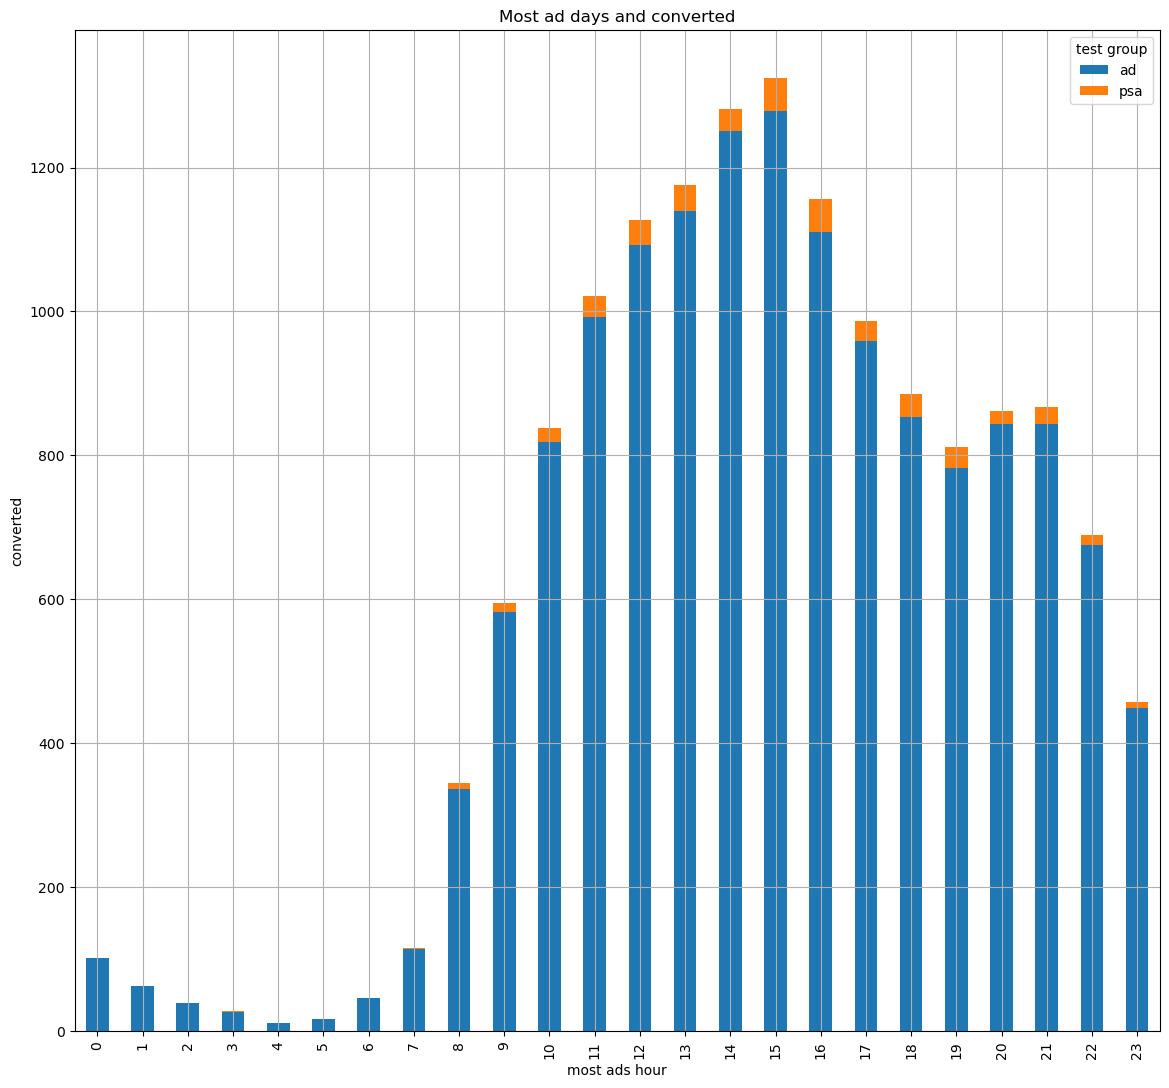

In [19]:
print(df.groupby("most ads hour")["converted"].sum())

ax = df.groupby(by =['most ads hour', 'test group'])['converted'].sum().unstack('test group').plot(kind= 'bar', figsize= (14,13), grid= True, stacked= True)
ax.set_ylabel('converted')
ax.set_title('Most ad days and converted')
plt.show()

### for Advertishement campaigns, which hour we had the greatest conversion?

During the 15th hour

most ads hour
0      102
1       62
2       39
3       27
4       11
5       16
6       46
7      114
8      337
9      582
10     818
11     992
12    1092
13    1140
14    1251
15    1279
16    1111
17     959
18     853
19     782
20     843
21     843
22     675
23     449
Name: converted, dtype: int64


<Axes: xlabel='most ads hour'>

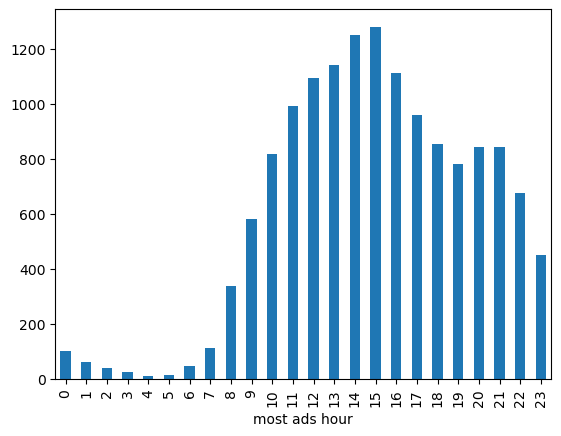

In [20]:
print(df.loc[df["test group"]=="ad"].groupby("most ads hour")["converted"].sum())
df.loc[df["test group"]=="ad"].groupby("most ads hour")["converted"].sum().plot(kind="bar")

### for Public Service campaigns, which hour we had the greatest conversion?

During the 15th hour

most ads hour
0      0
1      0
2      0
3      1
4      0
5      0
6      0
7      2
8      7
9     13
10    20
11    30
12    35
13    36
14    30
15    46
16    45
17    28
18    32
19    29
20    19
21    24
22    15
23     8
Name: converted, dtype: int64


<Axes: xlabel='most ads hour'>

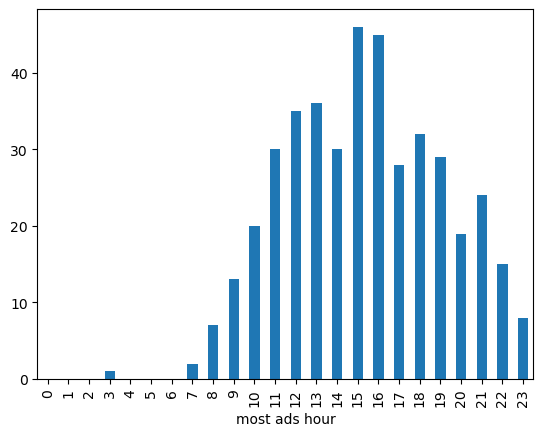

In [21]:
print(df.loc[df["test group"]=="psa"].groupby("most ads hour")["converted"].sum())
df.loc[df["test group"]=="psa"].groupby("most ads hour")["converted"].sum().plot(kind="bar")

# A/B Testing

In [22]:
ad_dist = df[df["test group"] == 'ad'].reset_index(drop=True)
psa_dist = df[df["test group"] == 'psa'].reset_index(drop=True)

In [23]:
ad_dist.shape, psa_dist.shape

((564577, 6), (23524, 6))

## test of Normality

In [24]:
from scipy.stats import shapiro, levene, mannwhitneyu, ttest_ind

In [25]:
_, pvalue_ad = shapiro(ad_dist.converted)
_, pvalue_psa = shapiro(psa_dist.converted)
print(pvalue_ad, pvalue_psa)

0.0 0.0


/opt/conda/lib/python3.10/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


## Test of homogeneity of variance

In [26]:
# variance homogeneity check
levene(psa_dist.converted, ad_dist.converted)

LeveneResult(statistic=54.322884225785735, pvalue=1.703305262368155e-13)

p_values are less than 0.05 so the normality and variance assumptions are met.

## A/B Testing, independent T-test

Since Shapiro's test and the test of homogenous variance are met

In [27]:
# test for significance
ttest_ind(psa_dist.converted, ad_dist.converted)

Ttest_indResult(statistic=-7.37040597428566, pvalue=1.7033052627831264e-13)

the results are statistically significant!
- pvalue strongly rejects the null hypothesis
- difference in conversions are due to the ads

In [28]:
# conversion rates
converts_psa = psa_dist.groupby('converted')['user id'].count()
converts_ad = ad_dist.groupby('converted')['user id'].count()
(100 * converts_psa[1]/converts_psa[0]), (100 * converts_ad[1]/converts_ad[0])

(1.8178670360110802, 2.6216295800812137)

The ad group achieved a higher conversion rate of 2.62% compared to the PSA group's 1.81%. This indicates that the ad campaign was more effective in driving conversions compared to the PSA.

The t-test p-value of 0.0000 indicates that the difference in conversion rates between the two groups is statistically significant, meaning that it is highly unlikely to have occurred by chance alone. This provides strong evidence for the observed difference between the two groups.

Overall, these results suggest that the ad campaign successfully drove conversions, and the difference in conversion rates between the two groups can be attributed to the impact of the ads.

# Thank you for your time!